### IMPORTING NECESSARY LIBRARIES

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns                   #Visualisation
import matplotlib.pyplot as plt         #Visualisation

### Reading CSV file Coffee_sales.csv

In [98]:
df = pd.read_csv("E:/Unified Mentor Projects/Coffee_sales.csv",header=0)  #Load the dataset into dataframe

In [99]:
df.head() #Printing Head(First 5 rows) of the dataframe

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [100]:
df.shape  #Printing the Total Dimensions(Rows,Columns) of the dataframe

(1133, 6)

In [101]:
df.info()  #Describing the Data Types of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [102]:
df.isnull().sum()  #Checking Missing(null) Values in the dataframe

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [103]:
#df = df.dropna()  #Dropping Missing Values from the dataframe

In [104]:
df[df['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

In [105]:
## From above output All of the transactions with null 'card' information are from cash users.


In [106]:
#Convert date and datetime to datetme format
df['date']=pd.to_datetime(df['date'])
df['datetime']=pd.to_datetime(df['datetime'])
#Create column of Month, Weekdays, and Hours
df['month']=df['date'].dt.strftime('%Y-%m')
df['day']=df['date'].dt.strftime('%w')
df['hour']=df['datetime'].dt.strftime('%H')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [107]:
# Let's Check the Monthly Data
monthly_sales = df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


### Exploratory Data Analysis (EDA)

<Axes: >

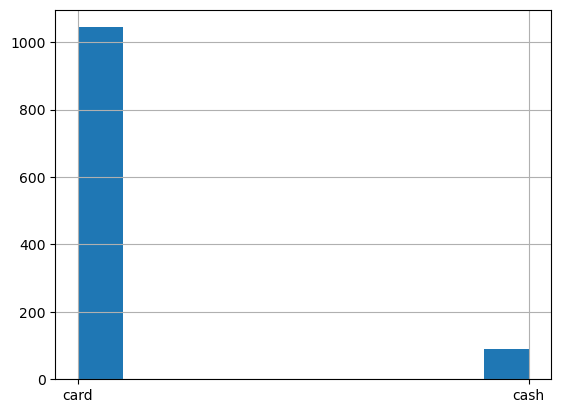

In [109]:
df['cash_type'].hist()

Text(0.5, 0, 'Revenue')

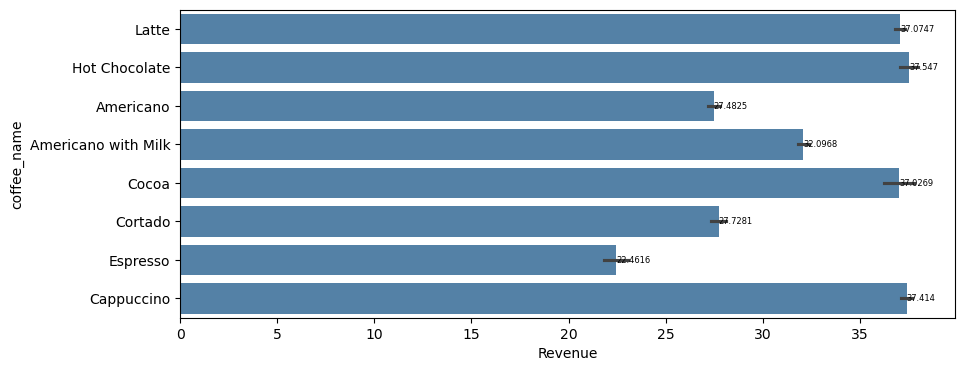

In [110]:
#Plotting Barplot for Revenue generated by each coffee
plt.figure(figsize=(10,4))
x = sns.barplot(data=df,x='money',y='coffee_name',color='steelblue')
x.bar_label(x.containers[0], fontsize=6)
plt.xlabel('Revenue')

##### Latte is the product with the highest revenue, while Expresso is the one at the bottom.

Text(0, 0.5, 'Count')

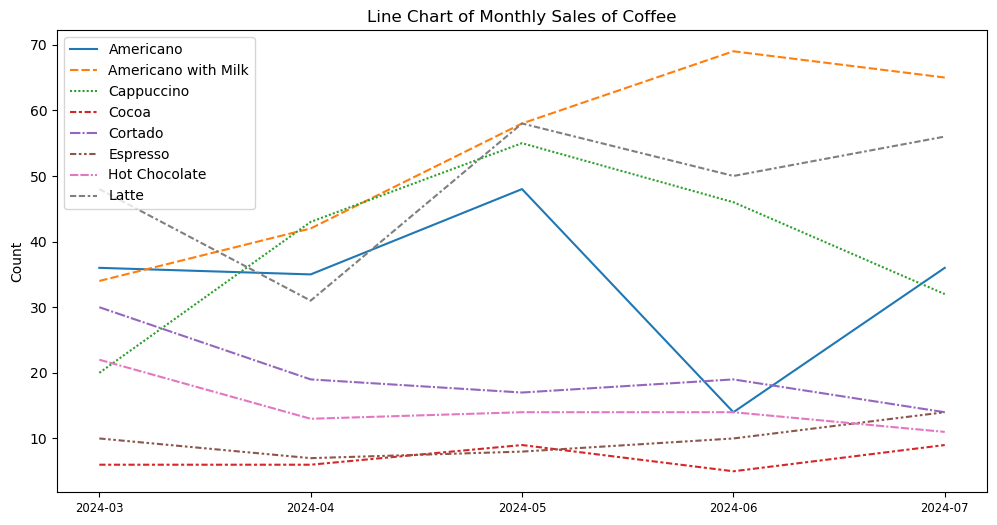

In [112]:
#Plotting Line Chart of Monthly sales of Coffee
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales,alpha=1)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')
plt.title("Line Chart of Monthly Sales of Coffee")
plt.ylabel('Count')

##### As shown in the line chart above, Americano with Milk and Latte, and Cappuccino are top selling coffee types, while Cocoa and Expresso have
##### lowest sales. Additionally, Americano with Milk and Latte show an upward trending.


In [114]:
weekday_sales = df.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


Text(0.5, 1.0, 'Bar Plot of Weekday Sales of Coffee')

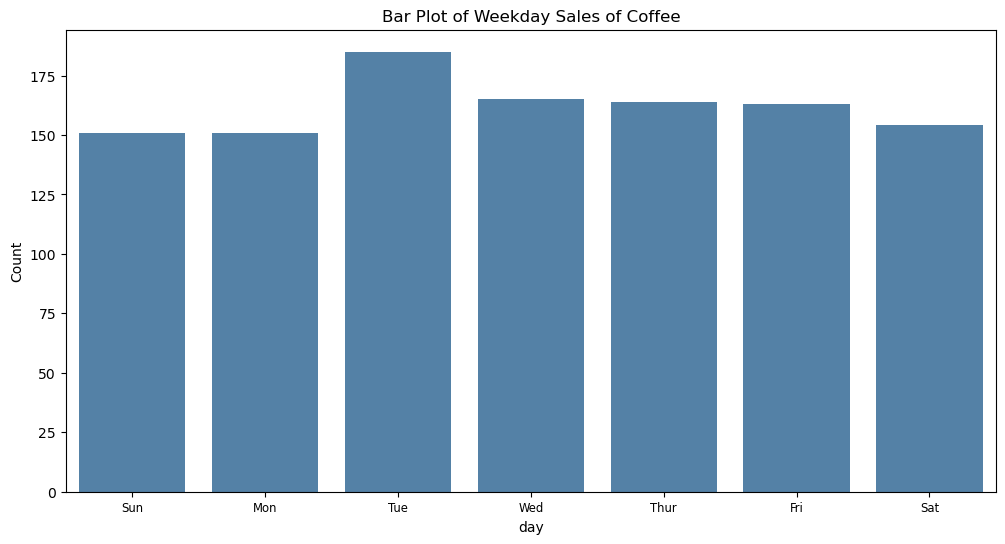

In [115]:
#Plotting Barplot of Weekday Sales of Coffee
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.ylabel("Count")
plt.title("Bar Plot of Weekday Sales of Coffee")

In [116]:
#Let's see daily sales of coffee below
daily_sales = df.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales


coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [117]:
#Let's see count of hourly sales of coffee
hourly_sales = df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


Text(0, 0.5, 'Count')

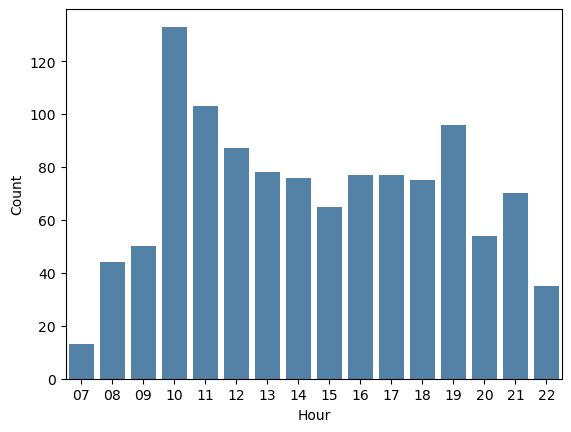

In [118]:
#Plotting BarPlot for count of Hourly sales of coffee
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')
plt.xlabel('Hour')
plt.ylabel('Count')

##### Overall, two peak hours within each day can be observed: 10:00am and 7:00pm. 

In [120]:
hourly_sales_by_coffee = df.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


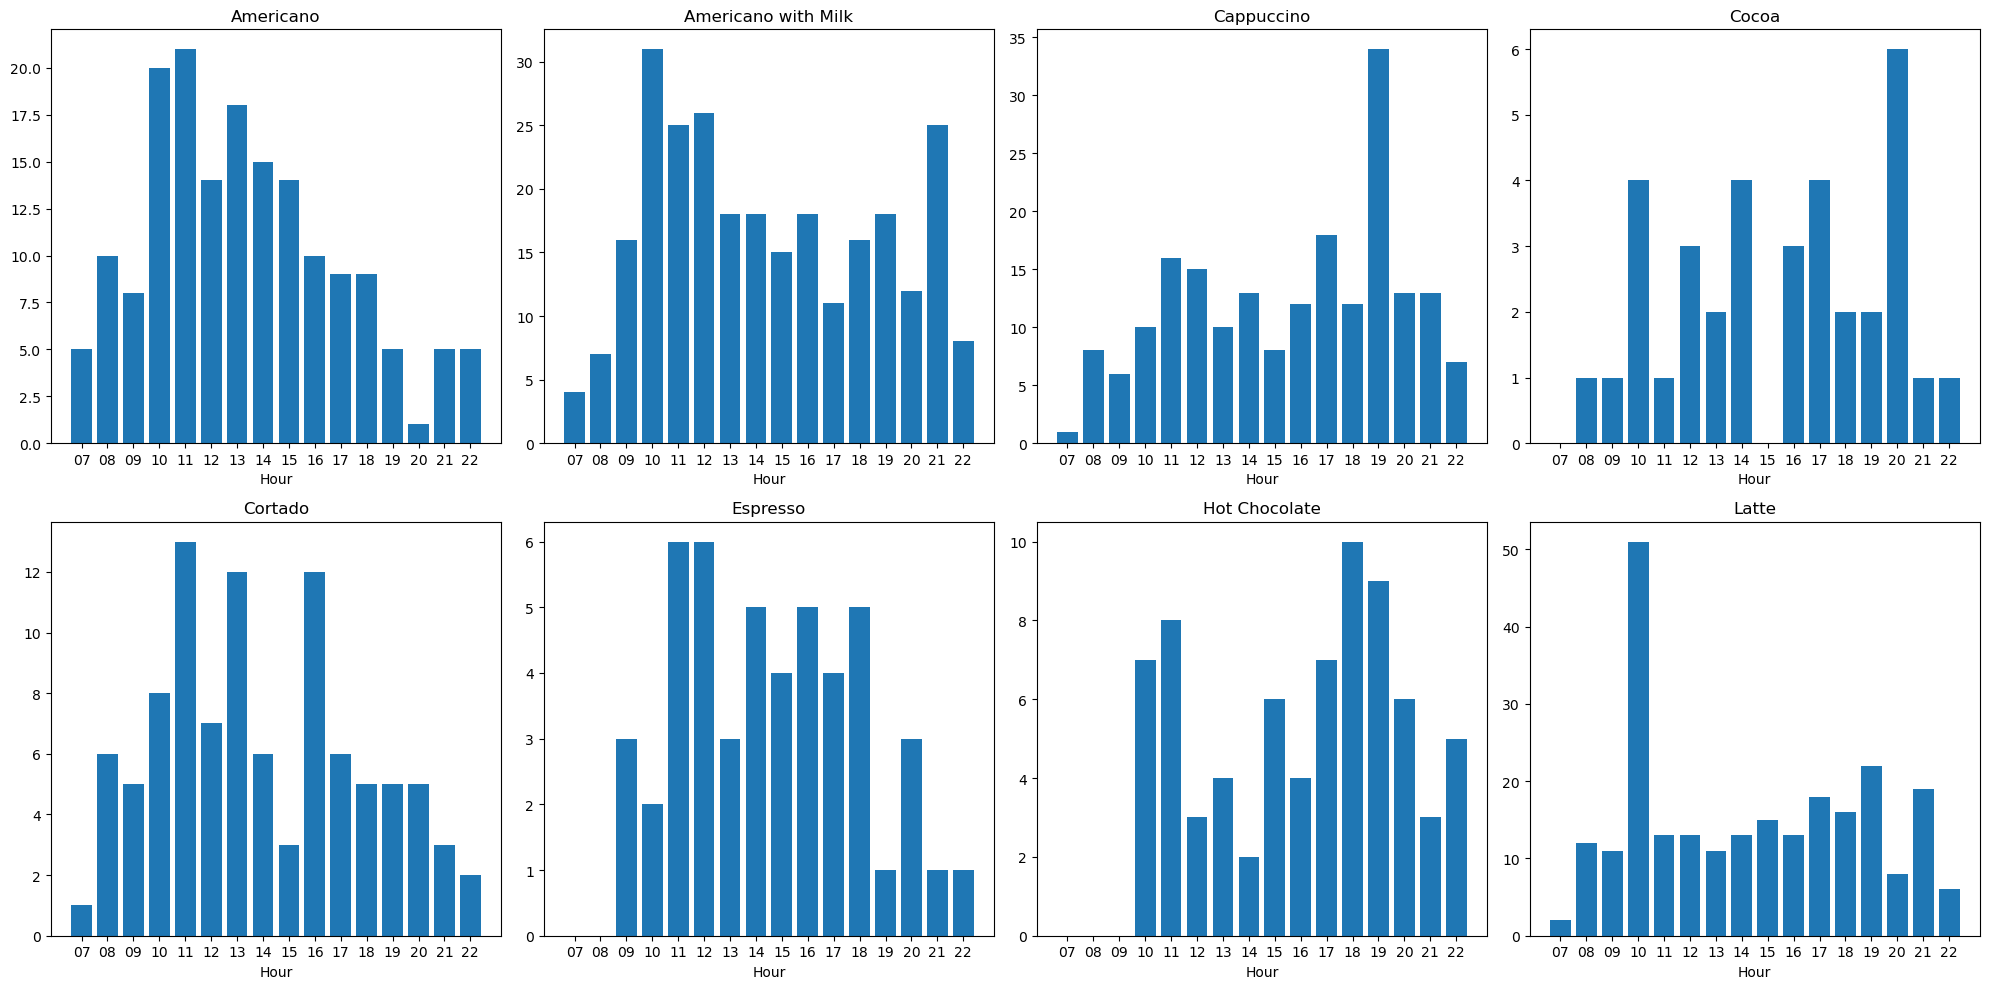

In [121]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# Flatten the array of subplots for easy iteration
axs = axs.flatten()
# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
# Skip the first column ('Index')
    axs[i].bar(hourly_sales_by_coffee['hour'],hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
#axs[i].set_ylabel('Sales')
plt.tight_layout()
# Show the plot
plt.show()

##### The plots above illustrate the shopping traffic for each product throughout the
##### day. Notably, all products experience a peak in traffic around 10:00 AM, with
##### this trend being particularly pronounced for Latte. Additionally, Cappuccino,
##### Cocoa, and Hot Chocolate tend to be more popular during the evening hours,
##### specifically between 6:00pm and 8:00pm.

### Conclusion

#### From the analysis above, we have uncovered valuable insights into customer
#### shopping patterns on a daily and weekly basis. We have identified the most
#### popular coffee products and observed the shopping trends over time. These
#### findings are instrumental in optimizing inventory planning, designing the
#### layout of vending machines, and determining the ideal restock times for coffee
#### products.